# Explore Public Transportation in USA
## *Year of 2012*

## _Figure 1_:
**What was the capacity of public transportation service provided by different transit modes and comsumed by residents?**

## Data source list:

* Data of public transportation from National Transit Database

## Glossary
* Transit mode
  * AR: In recognition of the special Federal relationship with the Alaska Railroad (AR), the passenger service portion of the Alaska Railroad (AR) is considered eligible for certain FTA funding under the Fixed Guideway Modernization program. The service encompasses only car miles for passenger cars; car miles for freight cars are specifically excluded.
  * CB: Commuter Bus
  * CC: Cable Car
  * CR: Commuter Rail
  * DR: Demand Response
  * DT: A special form of the demand response mode operated through taxicab providers. The mode is always purchased transportation type of service.
  * FB: Ferryboat
  * HR: Heavy Rail
  * IP: Inclined Plane
  * LR: A transit mode that typically is an electric railway with a light volume traffic capacity compared to heavy rail (HR)
  * MB: Bus
  * MG: Monorail and Automated Guideway modes
  * PB: Publico
  * RB: Bus Rapid Transit
  * SR: Streetcar Rail
  * TB: Trolleybus
  * VP: A transit mode comprised of vans, small buses and other vehicles operating as a ride sharing arrangement, providing transportation to a group of individuals traveling directly between their homes and a regular destination within the same geographical area. 
  * YR: Hybrid Rail

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# NTD data of service
ntd_service_xls = "../data/ntd/2012/2012_Service.xls"
ntd_service_df = pd.read_excel(ntd_service_xls)

In [3]:
select_flag = np.logical_and.reduce((ntd_service_df.loc[:, 'Time_Period_Desc']=='Annual Total', \
                                     ~np.isnan(ntd_service_df.loc[:, 'Pass_Car_Rev_Miles_Num']), \
                                     ~np.isnan(ntd_service_df.loc[:, 'Passenger_Miles_Num'])))

ntd_service_df = ntd_service_df.loc[select_flag, :]
grouped_ntd_service = ntd_service_df.loc[:, ['Trs_Id', \
                                             'Mode_Cd', \
                                             'Pass_Car_Rev_Miles_Num', \
                                             'Passenger_Miles_Num']].groupby(['Trs_Id', 'Mode_Cd'])

In [4]:
grouped_ntd_service_agg = grouped_ntd_service.aggregate(np.sum)

In [5]:
idx = grouped_ntd_service_agg.index.names.index('Mode_Cd')
grouped_ntd_service_agg = grouped_ntd_service_agg.reset_index('Mode_Cd')

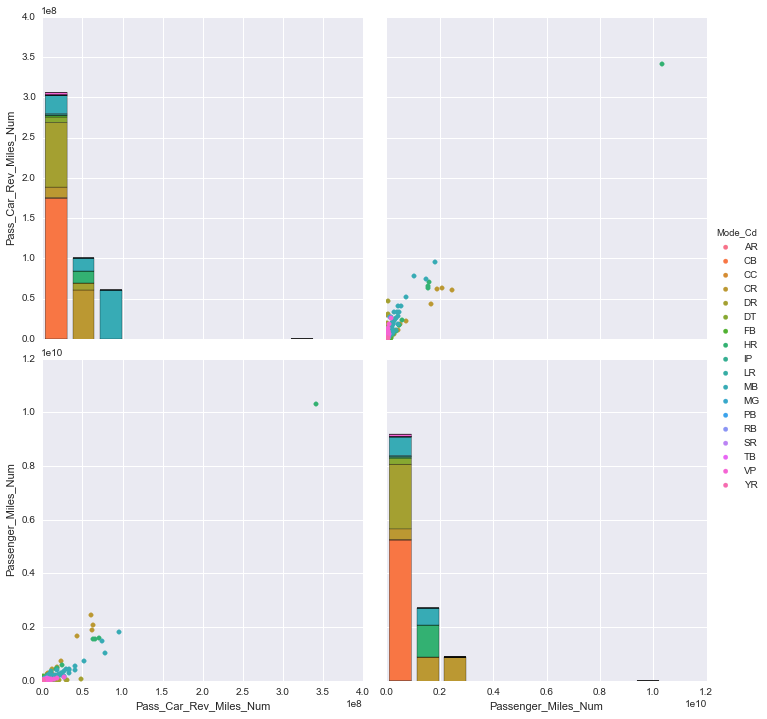

In [6]:
# Plot vehicle revenue miles against passenger miles for different transit modes
g = sns.PairGrid(grouped_ntd_service_agg, hue='Mode_Cd', size=5)
g.map_diag(plt.hist, bins=10, log=True)
g.map_offdiag(plt.scatter)
for ga in g.axes.flatten().tolist():
    ga.set_xlim((0, ga.get_xlim()[1]))
    ga.set_ylim((0, ga.get_ylim()[1]))
g.add_legend()

In [7]:
# find the transit agency with exceptionally large HR-mode miles
target_idx = np.where(grouped_ntd_service_agg['Passenger_Miles_Num']>0.9e10)[0][0]
target_trs_id = grouped_ntd_service_agg.index.get_level_values(0)[target_idx]

In [8]:
# read NTD transit agency information
# ntd_agency_info_xls = "../data/ntd/2012/2012_Agency_Information"
ntd_agency_info_xls = "http://www.ntdprogram.gov/ntdprogram/datbase/2012_database/2012_Agency_Information.xls"
ntd_agency_info_df = pd.read_excel(ntd_agency_info_xls)

In [9]:
ntd_agency_info_df.loc[ntd_agency_info_df['Trs_Id']==target_trs_id, :].T

,106
Trs_Id,2008
Company_Nm,MTA New York City Transit
Logo_Cd,NYCT
Agency_Active_Fl,A
Agency_Type_Desc,"2. Subsidiary unit of a transit agency, report..."
Org_Type,Subsidiary
Organization_Type_Desc,NaN
Institutional_Structure_Desc,NaN
Fy_Day_Num,2012-12-31 00:00:00
NTD_Report_Due,2013-04-29 00:00:00
